In [47]:
import openpyxl 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# https://www.geeksforgeeks.org/working-with-excel-spreadsheets-in-python/
path = "ground-truth.xlsx"
gt = []
wb_obj = openpyxl.load_workbook(path) 
sheet_obj = wb_obj.active
for i in range(2, 7):
        x1 = sheet_obj.cell(row = i, column = 1).value
        y1 = sheet_obj.cell(row = i, column = 2).value
        x2 = sheet_obj.cell(row = i, column = 3).value + x1
        y2 = sheet_obj.cell(row = i, column = 4).value + y1
        gt.append([x1, y1, x2, y2])
print(gt)

[[153, 21, 173, 46], [116, 30, 129, 53], [125, 135, 155, 170], [30, 160, 60, 180], [10, 5, 30, 30]]


In [21]:
path = "detections.xlsx"
detections = []
wb_obj = openpyxl.load_workbook(path) 
sheet_obj = wb_obj.active
for i in range(2, 10):
        x1 = sheet_obj.cell(row = i, column = 1).value
        y1 = sheet_obj.cell(row = i, column = 2).value
        x2 = sheet_obj.cell(row = i, column = 3).value + x1
        y2 = sheet_obj.cell(row = i, column = 4).value + y1
        detections.append([x1, y1, x2, y2])
print(detections)

[[11, 5, 30, 31], [18, 39, 49, 62], [55, 72, 89, 108], [114, 31, 128, 52], [24, 98, 45, 132], [36, 150, 77, 176], [124, 136, 153, 171], [92, 153, 119, 200]]


In [10]:
def get_iou(a, b):
    x1 = max(a[0], b[0])
    y1 = max(a[1], b[1])
    x2 = min(a[2], b[2])
    y2 = min(a[3], b[3])

    width = (x2 - x1)
    height = (y2 - y1)

    if (width < 0) or (height < 0):
        return 0.0
    area_overlap = width * height

    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    iou = area_overlap / (area_combined)
    return iou

In [17]:
def check_correct_column(gt, detections, iou_threshold):
    FP = 0
    TP = 0
    actual = None
    result = []
    path = "detections.xlsx"
    wb_obj = openpyxl.load_workbook(path) 
    sheet_obj = wb_obj.active
    for d in detections:
        for g in gt:
            iou = get_iou(d, g)
            if(iou < iou_threshold):
                actual = 'FALSE'
            else:
                actual = 'TRUE'
                break
        result.append(actual)
    return result

In [101]:
def ap(th):
    if th == 0.25:
        c = 6
    elif th == 0.5:
        c = 7
    elif th == 0.75:
        c = 8
    path = "detections.xlsx"
    col = []
    scores = []
    wb_obj = openpyxl.load_workbook(path) 
    sheet_obj = wb_obj.active
    for i in range(2, 10): 
        cell1_obj = sheet_obj.cell(row = i, column = c)
        cell2_obj = sheet_obj.cell(row = i, column = 5) 
        col.append(cell1_obj.value)
        scores.append(cell2_obj.value)
    chart = []
    i = 0.9
    recall = 0
    
    while(i >= 0.1):
        TP = 0
        FP = 0
        FN = 0
        for j, s in enumerate(scores):
            if (s > i) and (col[j] == 'TRUE' or col[j] == True):
                TP += 1
            if (s > i) and (col[j] == 'FALSE' or col[j] == False):
                FP += 1
            if (s < i) and (col[j] == 'TRUE' or col[j] == True):
                FN += 1
        total_predicted = TP + FP
        total_gt = TP + FN
        if total_predicted == 0:
            if total_gt == 0:
                p = 1.
            else:
                p = 0.
        elif total_gt == 0:
            recall = 1.
        else:
            recall = float(TP) / total_gt
            p = float(TP) / total_predicted
        chart.append([recall, p])
        i -= 0.1
    return chart

In [94]:
def area(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

P:  0.06190476190476213


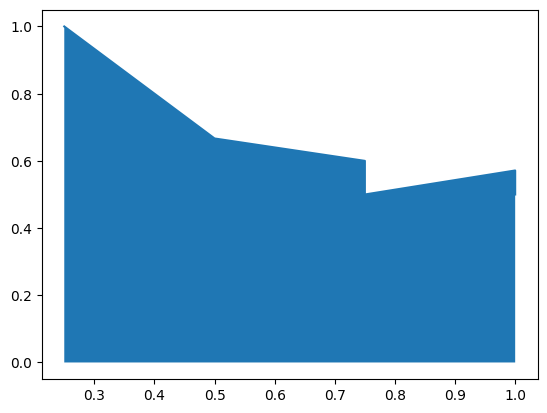

In [96]:
ap_val = ap(0.25)
x = [pair[0] for pair in ap_val]
y = [pair[1] for pair in ap_val]
print("P: ", area(x, y))
plt.plot(x, y)
plt.fill_between(x, y)

P:  0.030555555555555447


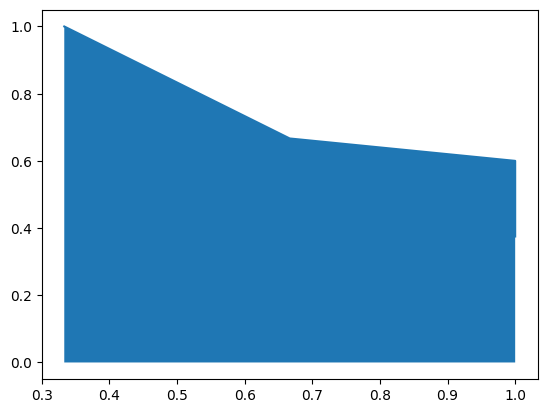

In [104]:
ap_val = ap(0.5)
x = [pair[0] for pair in ap_val]
y = [pair[1] for pair in ap_val]
print("P: ", area(x, y))
plt.plot(x, y)
plt.fill_between(x, y)

P:  0.1416666666666666


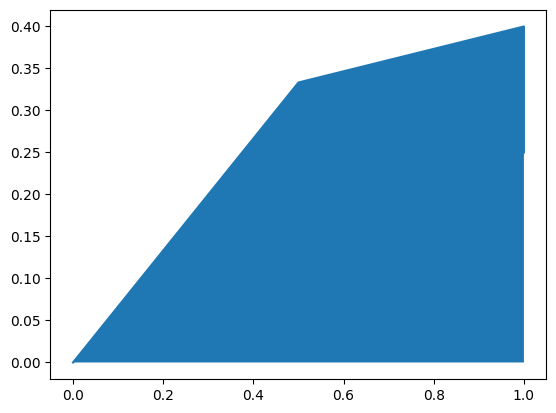

In [106]:
ap_val = ap(0.75)
x = [pair[0] for pair in ap_val]
y = [pair[1] for pair in ap_val]
print("P: ", area(x, y))
plt.plot(x, y)
plt.fill_between(x, y)